# Web Scraping using Beautiful Soap

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scraping Library
from urllib.request import urlopen
from bs4 import BeautifulSoup

'Photo of Hubertiming Result Website'

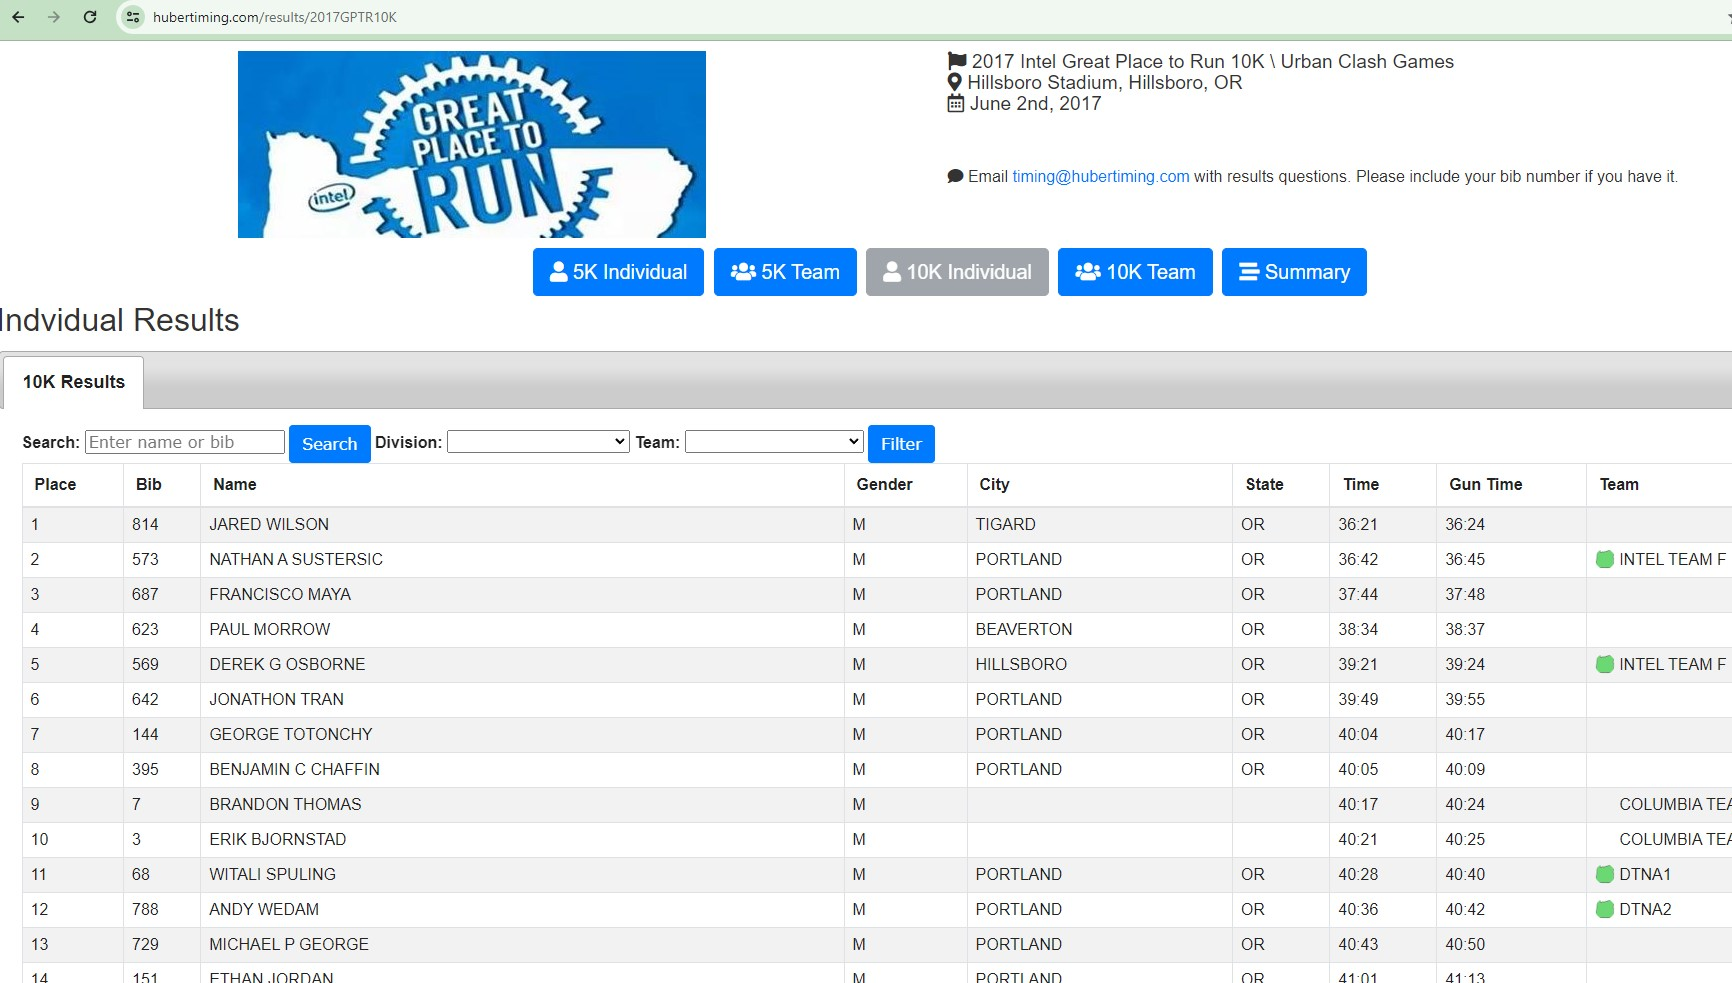

In [9]:
from IPython.display import Image
image_path = '/content/hubertiming.jpg'
display("Photo of Hubertiming Result Website")
Image(filename=image_path)

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [10]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [11]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [14]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [16]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [17]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [18]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

In [19]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [20]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [21]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [22]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


# Data Manipulation and Data Cleaning

In [23]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [24]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [25]:
col_labels = soup.find_all('th')

In [26]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [28]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [29]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [30]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


In [31]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [32]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [33]:
df6 = df5.dropna(axis=0, how='any')

In [34]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [35]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [36]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [57]:
df7.columns = df7.columns.str.strip()

In [58]:
df7.isnull().sum()

Place          0
Bib            0
Name           0
Gender         0
City           0
State          0
Time           0
Gun Time       0
Team           0
Runner_mins    0
dtype: int64

In [65]:
df7['Runner_mins'].value_counts()

3045.000000    3
3130.000000    3
2889.000000    3
3311.000000    3
2632.000000    3
              ..
3244.000000    1
3240.000000    1
3233.000000    1
3234.000000    1
102.166667     1
Name: Runner_mins, Length: 508, dtype: int64

# Data Analysis and Visualization

In [59]:
print(df7.columns)

Index(['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time',
       'Team', 'Runner_mins'],
      dtype='object')


In [68]:
time_list = df7['Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes
time_mins = []
for time_str in time_list:
    components = time_str.split(':')
    h = int(components[0])
    m = int(components[1])

    # Check if seconds are present
    s = int(components[2]) if len(components) == 3 else 0

    total_minutes = (h * 60) + m + (s / 60)
    time_mins.append(total_minutes)

print(time_mins)

[2181.0, 2202.0, 2264.0, 2314.0, 2361.0, 2389.0, 2404.0, 2405.0, 2417.0, 2421.0, 2428.0, 2436.0, 2443.0, 2461.0, 2479.0, 2503.0, 2519.0, 2543.0, 2549.0, 2555.0, 2556.0, 2557.0, 2576.0, 2606.0, 2607.0, 2620.0, 2622.0, 2623.0, 2626.0, 2626.0, 2627.0, 2627.0, 2644.0, 2645.0, 2646.0, 2647.0, 2663.0, 2678.0, 2681.0, 2682.0, 2688.0, 2703.0, 2705.0, 2710.0, 2711.0, 2711.0, 2713.0, 2714.0, 2715.0, 2717.0, 2727.0, 2728.0, 2729.0, 2736.0, 2736.0, 2740.0, 2740.0, 2749.0, 2755.0, 2762.0, 2773.0, 2780.0, 2783.0, 2786.0, 2793.0, 2795.0, 2801.0, 2802.0, 2805.0, 2806.0, 2807.0, 2809.0, 2809.0, 2812.0, 2815.0, 2816.0, 2820.0, 2822.0, 2825.0, 2825.0, 2828.0, 2829.0, 2847.0, 2849.0, 2851.0, 2855.0, 2862.0, 2865.0, 2869.0, 2870.0, 2875.0, 2876.0, 2876.0, 2878.0, 2879.0, 2889.0, 2893.0, 2898.0, 2898.0, 2900.0, 2901.0, 2909.0, 2910.0, 2917.0, 2918.0, 2919.0, 2920.0, 2922.0, 2923.0, 2924.0, 2929.0, 2936.0, 2943.0, 2949.0, 2952.0, 2958.0, 2963.0, 2966.0, 2970.0, 2972.0, 2975.0, 2982.0, 2984.0, 2984.0, 2991.0,

In [66]:
df7['Name'] = df7['Name'].str.replace(r'\r\n', '').str.strip()
df7['Team'] = df7['Team'].str.replace(r'\r\n|\n\r\n', '').str.strip()

<ipython-input-66-a96468135996>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df7['Name'] = df7['Name'].str.replace(r'\r\n', '').str.strip()
<ipython-input-66-a96468135996>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df7['Team'] = df7['Team'].str.replace(r'\r\n|\n\r\n', '').str.strip()


In [74]:
df7['Runner_mins'] = time_mins
df7['Runner_mins'] = df7['Runner_mins'].round(2)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,2181.0
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F,2202.0
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,,2264.0
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,2314.0
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F,2361.0


In [75]:
df7['Runner_mins'].value_counts()

3300.00    5
65.27      3
67.27      3
61.80      3
60.30      3
          ..
3196.00    1
3192.00    1
3189.00    1
3186.00    1
101.30     1
Name: Runner_mins, Length: 516, dtype: int64

In [76]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,1659.333189
std,1515.584990
min,60.020000
25%,68.300000
50%,2543.000000
75%,3109.000000
max,3595.000000


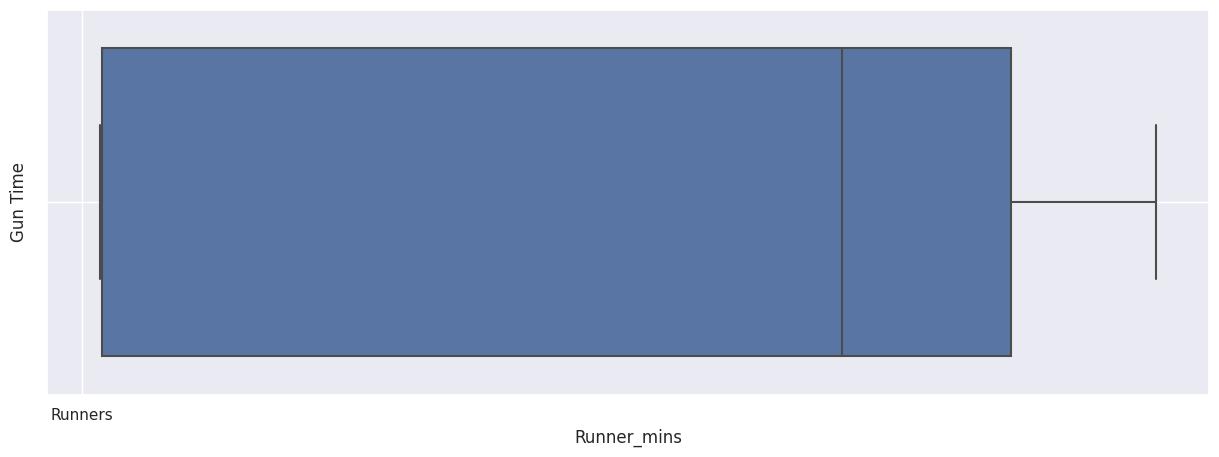

In [77]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.boxplot(x=df7['Runner_mins'])
plt.grid(True, axis='y')
plt.ylabel('Gun Time')
plt.xticks([0], ['Runners'])

plt.show()

Did the runners' finish times follow a normal distribution?

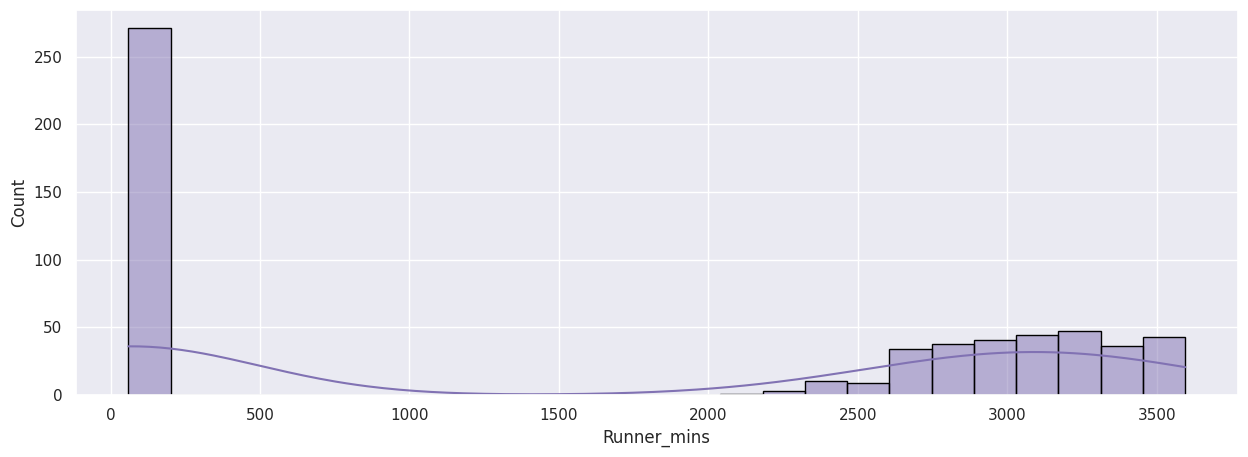

In [78]:
x = df7['Runner_mins']
# Create a distribution plot with histogram and kernel density estimate (KDE)
sns.histplot(x, kde=True, color='m', bins=25, edgecolor='black')
plt.show()

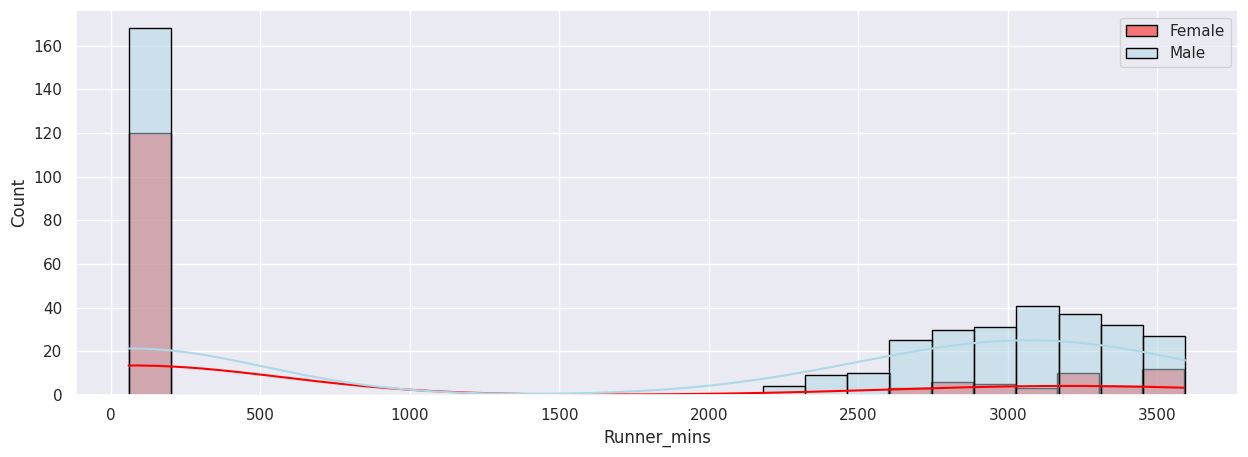

In [62]:
f_fuko = df7.loc[df7['Gender'] == ' F']['Runner_mins']
m_fuko = df7.loc[df7['Gender'] == ' M']['Runner_mins']

# Create distribution plots for female and male runners
sns.histplot(f_fuko, kde=True, color='red', bins=25, edgecolor='black', label='Female')
sns.histplot(m_fuko, kde=True, color='lightblue', bins=25, edgecolor='black', label='Male')

plt.legend()
plt.show()

In [80]:
g_stats = df7.groupby("Gender", as_index=True).describe()
print(g_stats)

       Runner_mins                                                     \
             count         mean          std    min      25%      50%   
Gender                                                                  
 F           163.0  1078.874417  1485.525112  60.20  66.5500    75.22   
 M           414.0  1887.871304  1467.178082  60.02  69.3225  2722.00   

                         
            75%     max  
Gender                   
 F      2888.00  3595.0  
 M      3145.75  3593.0  


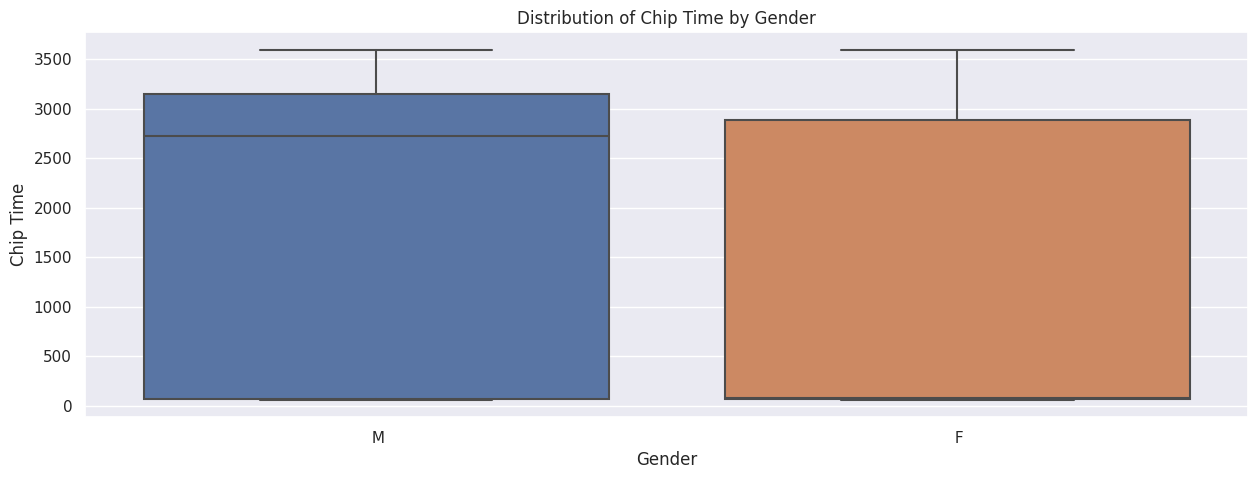

In [81]:
sns.boxplot(x='Gender', y='Runner_mins', data=df7)
plt.ylabel('Chip Time')
plt.title('Distribution of Chip Time by Gender')
plt.show()

In [86]:
city_counts = df7['City'].value_counts()

In [87]:
state_counts = df7['State'].value_counts()

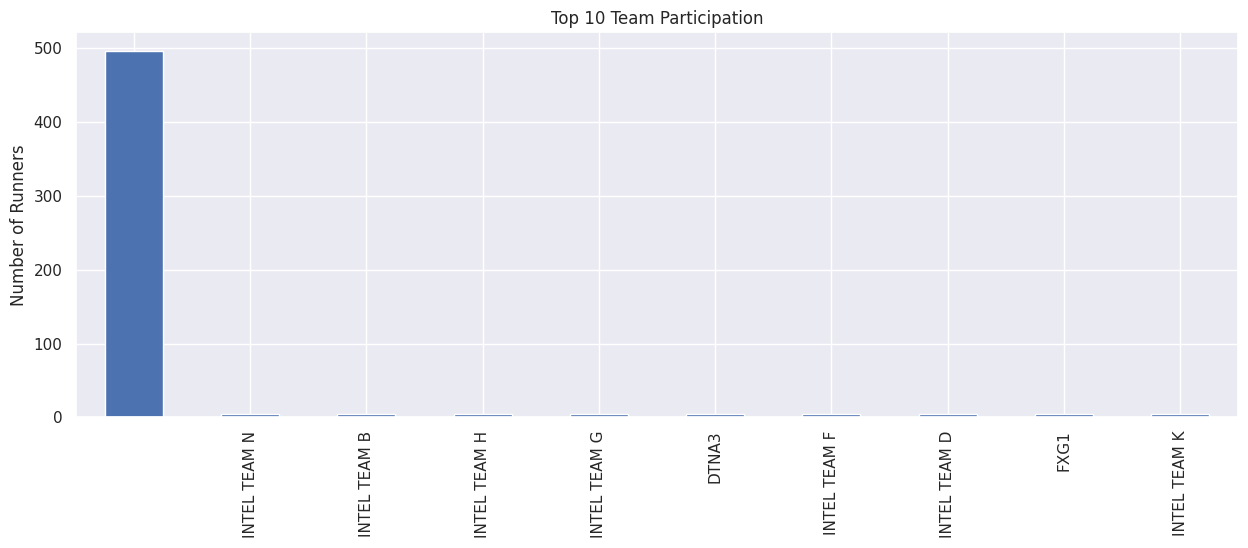

In [95]:
team_counts = df7['Team'].value_counts().nlargest(10)

# Plotting the top 10 teams
team_counts.plot(kind='bar')
plt.title('Top 10 Team Participation')
plt.ylabel('Number of Runners')
plt.show()

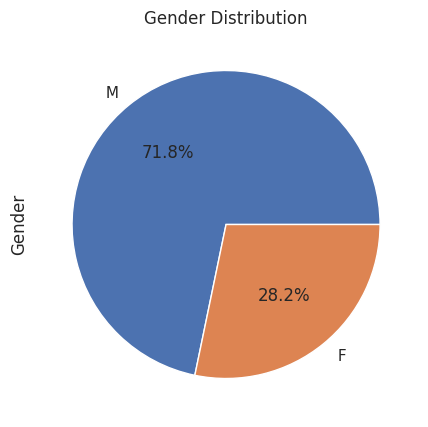

In [90]:
gender_counts = df7['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [93]:
bib_counts = df7['Bib'].value_counts()
bib_counts

 814    1
 705    1
 836    1
 644    1
 5      1
       ..
 707    1
 763    1
 817    1
 881    1
 443    1
Name: Bib, Length: 577, dtype: int64

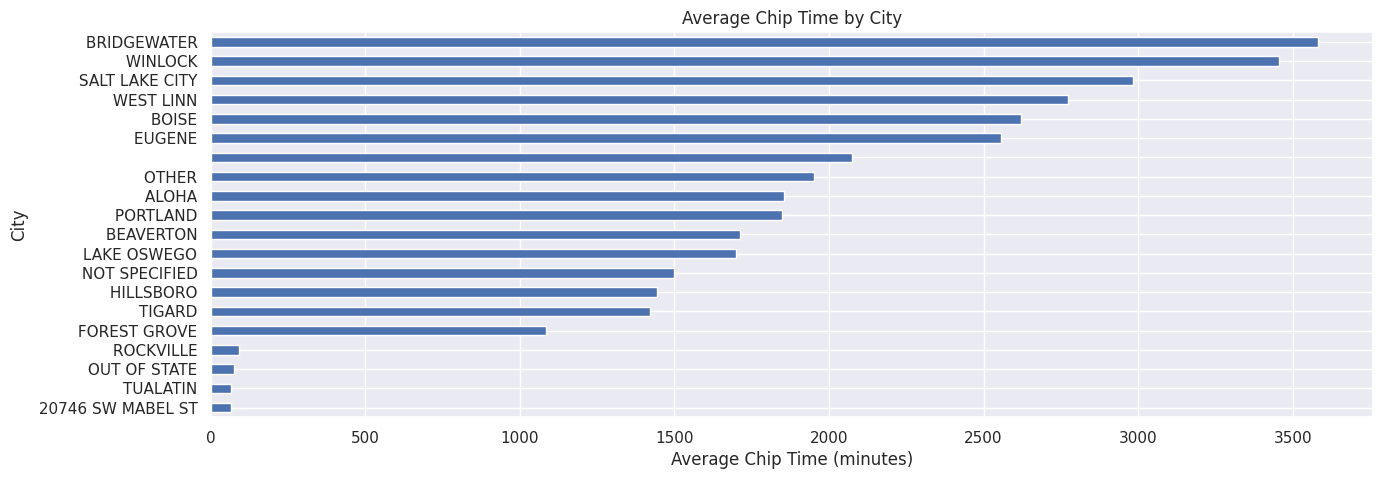

In [94]:
city_time_comparison = df7.groupby('City')['Runner_mins'].mean().sort_values()
city_time_comparison.plot(kind='barh')
plt.title('Average Chip Time by City')
plt.xlabel('Average Chip Time (minutes)')
plt.show()